In [1]:
import json
import pandas as pd
from textblob import TextBlob
import re
import seaborn as sns
import collections
from matplotlib import pyplot as plt

In [3]:
data = []
with open('tweet_sample.2016-1-1.txt') as tweetfile:
    for ea in tweetfile.readlines():
#         print(ea)
        data.append(json.loads(ea))

In [42]:
print(data[0].keys())

dict_keys(['created_at', 'id', 'id_str', 'text', 'source', 'truncated', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'entities', 'favorited', 'retweeted', 'possibly_sensitive', 'filter_level', 'lang', 'timestamp_ms'])


In [4]:
for i in range(0,len(data)):
    print(data[i]['text'])
    print('---')

"This Is Brutal: Meet the Women! (11-19)" https://t.co/jYmJuacF8g #TheBachelor
---
RT @a2yulia: The Bachelor 2016 Spoilers Watch the Drama in New Sneak Peek... https://t.co/dUmgUyzVZd
---
RT @Millsy11374: Look at what's right outside Times Square?  4 days away #Bachelornation! #TheBachelor https://t.co/QN1e8xN0rS
---
I'm at my stepsisters and #TheBachelor was on for a second and it was intense as fuck I might have to check it out
---
RT @BachelorABC: Ben Higgins is a perfect 10! This #TheBachelor key art will melt your heart. https://t.co/UKDCEGt8i4 https://t.co/9YRXSxi7…
---
RT @SquirrelChatter: Is This Whitney Bischoff's New Boyfriend? Looks Like #TheBachelor Chris Soules Is Last Year's News! https://t.co/lXn3c…
---
RT @SquirrelChatter: Is This Whitney Bischoff's New Boyfriend? Looks Like #TheBachelor Chris Soules Is Last Year's News! https://t.co/lXn3c…
---
The Bachelor (DVD, 2000) Chris O'Donell Renee Zelwegger https://t.co/8XGKdip4j2 https://t.co/28NRVYo4C9
---
'The Bachelor's' Be

In [15]:
#https://www.geeksforgeeks.org/twitter-sentiment-analysis-using-python/

In [5]:
def clean_tweet(tweet): 
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split()) 
  

In [6]:
def get_tweet_sentiment(tweet): 
        ''' 
        Utility function to classify sentiment of passed tweet 
        using textblob's sentiment method 
        '''
        # create TextBlob object of passed tweet text 
        analysis = TextBlob(clean_tweet(tweet)) 
        # set sentiment 
        if analysis.sentiment.polarity > 0: 
            return 'positive'
        elif analysis.sentiment.polarity == 0: 
            return 'neutral'
        else: 
            return 'negative'

In [7]:
sentiment = []
for i in range(0,len(data)):
    sentiment.append(get_tweet_sentiment(data[i]['text']))

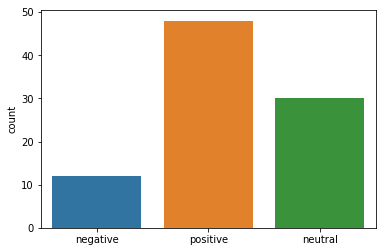

In [8]:
sns.countplot(sentiment)
plt.savefig('sentimentexample')

In [9]:
sentiment[88]

'positive'

In [11]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True, reduce_len=True)
wordlists = []
for ea in range(0,len(data)):
    wordlists.append(tknzr.tokenize(data[ea]['text']))
wordlist = [item for sublist in wordlists for item in sublist]

In [12]:
cts = collections.Counter(wordlist)

In [14]:
cts.most_common(25)

[('#TheBachelor', 55),
 ('The', 43),
 ('.', 38),
 (':', 37),
 ('!', 36),
 ('Bachelor', 35),
 ('?', 34),
 ('RT', 33),
 ('on', 25),
 ('the', 22),
 ('to', 21),
 ('is', 20),
 ('and', 18),
 ('Ben', 16),
 ('for', 15),
 (',', 15),
 ("'", 15),
 ('…', 15),
 ('#RoseParade', 15),
 ('"', 14),
 ('in', 14),
 ('it', 14),
 ('I', 14),
 ('you', 14),
 ('Is', 13)]